In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
plt.style.use('ggplot')

In [2]:
streams_df = pd.read_json("../data/spotify/StreamingHistory.json")

In [3]:
streams_df.head()

,artistName,endTime,msPlayed,trackName
0,Loud Luxury,2018-09-20 00:50,43263,Body (feat. brando)
1,Sia,2018-09-20 00:50,2645,Thunderclouds
2,Kanye West,2018-09-20 00:50,15346,I Love It (& Lil Pump)
3,Bazzi,2018-09-20 00:50,180000,Beautiful (feat. Camila Cabello)
4,Bazzi,2018-09-20 00:50,12032,Beautiful (feat. Camila Cabello)


In [4]:
len(streams_df)

4797

In [5]:
streams_df.endTime.max()

'2018-12-19 23:21'

In [6]:
streams_df.endTime.min()

'2018-09-20 00:50'

In [7]:
streams_df['sPlayed'] = round(streams_df['msPlayed']/1000)
streams_df['mPlayed'] = round(streams_df['sPlayed']/60)

In [8]:
streams_df['mPlayed'].describe()

count    4797.000000
mean        1.802585
std         3.594432
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        64.000000
Name: mPlayed, dtype: float64

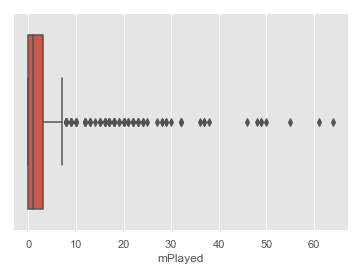

In [9]:
sns.boxplot(streams_df.mPlayed)

In [10]:
streams_df[streams_df['mPlayed']>=10].head(n=10)

,artistName,endTime,msPlayed,trackName,sPlayed,mPlayed
17,"Today, Explained",2018-09-20 00:50,1362233,Back to Juul,1362.0,23.0
132,"Today, Explained",2018-09-20 19:33,1442560,Have you talked to God about this?,1443.0,24.0
175,"Today, Explained",2018-09-21 18:19,1693248,elon r u ok,1693.0,28.0
192,"Today, Explained",2018-09-21 22:27,1447758,China's concentration camps,1448.0,24.0
308,The Science of Happiness,2018-09-24 12:56,787095,Why You Shouldn't Hate Small Talk,787.0,13.0
346,Ringer FC,2018-09-25 00:23,3824768,Are Liverpool Just Better Than PSG? | Ringer F...,3825.0,64.0
358,The Ringer NBA Show,2018-09-25 18:52,1729408,"Jimmy Butler v. the Timberwolves, the Lakers’ ...",1729.0,29.0
404,The Ringer NBA Show,2018-09-25 22:37,1721194,"Jimmy Butler v. the Timberwolves, the Lakers’ ...",1721.0,29.0
486,Slow Burn,2018-09-26 13:09,1670442,S2 Ep. 7: Bedfellows,1670.0,28.0
487,Slow Burn,2018-09-26 13:31,724976,S2 Ep. 7: Bedfellows,725.0,12.0


Looks like some of the longer streams are podcasts.

In [11]:
import datetime
datetime.datetime.strptime(streams_df.endTime[0], "%Y-%m-%d %H:%M")

datetime.datetime(2018, 9, 20, 0, 50)

In [12]:
streams_df['hour_of_day'] = streams_df['endTime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M").hour)

In [13]:
streams_df.head()

,artistName,endTime,msPlayed,trackName,sPlayed,mPlayed,hour_of_day
0,Loud Luxury,2018-09-20 00:50,43263,Body (feat. brando),43.0,1.0,0
1,Sia,2018-09-20 00:50,2645,Thunderclouds,3.0,0.0,0
2,Kanye West,2018-09-20 00:50,15346,I Love It (& Lil Pump),15.0,0.0,0
3,Bazzi,2018-09-20 00:50,180000,Beautiful (feat. Camila Cabello),180.0,3.0,0
4,Bazzi,2018-09-20 00:50,12032,Beautiful (feat. Camila Cabello),12.0,0.0,0


Text(0.5,1,'Streaming time in minutes by hour of day')

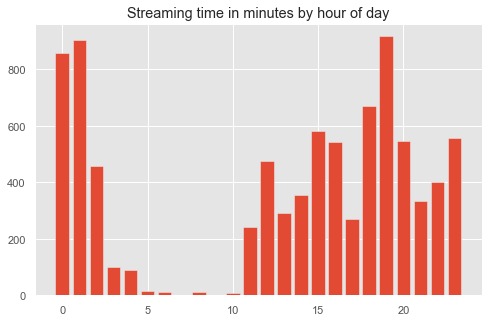

In [14]:
hour_of_day = streams_df.groupby('hour_of_day').sum()['mPlayed'].reset_index(name='mPlayed')


plt.figure(figsize=(8,5))
plt.bar(hour_of_day['hour_of_day'], hour_of_day['mPlayed'])
plt.title("Streaming time in minutes by hour of day")

My time spent on Spotify peaks during my commute home (6-8pm) and late at night (12-1am).

In [15]:
streams_df['day_of_week'] = streams_df['endTime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M").weekday())

In [16]:
streams_df.groupby('day_of_week').sum()['mPlayed'].reset_index(name='mPlayed')

,day_of_week,mPlayed
0,0,1277.0
1,1,1685.0
2,2,1394.0
3,3,1523.0
4,4,1117.0
5,5,829.0
6,6,822.0


I listen to more on the weekdays vs. weekends. This makes sense since I probably listen more during working hours (9-5pm on weekdays) on weekdays vs. weekends. Let's look at day of week vs. hour of day breakdown...

In [17]:
streams_df.head()

,artistName,endTime,msPlayed,trackName,sPlayed,mPlayed,hour_of_day,day_of_week
0,Loud Luxury,2018-09-20 00:50,43263,Body (feat. brando),43.0,1.0,0,3
1,Sia,2018-09-20 00:50,2645,Thunderclouds,3.0,0.0,0,3
2,Kanye West,2018-09-20 00:50,15346,I Love It (& Lil Pump),15.0,0.0,0,3
3,Bazzi,2018-09-20 00:50,180000,Beautiful (feat. Camila Cabello),180.0,3.0,0,3
4,Bazzi,2018-09-20 00:50,12032,Beautiful (feat. Camila Cabello),12.0,0.0,0,3


In [18]:
streams_df['date_hour'] = (streams_df['endTime']
                          .apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M").replace(minute=0, second=0, microsecond=0))
                          )

In [19]:
agg_streams_df = streams_df.groupby(['date_hour']).sum()['mPlayed'].reset_index()

In [20]:
agg_streams_df['day_of_week'] = agg_streams_df['date_hour'].apply(lambda x: x.weekday())

In [21]:
agg_streams_df.head()

,date_hour,mPlayed,day_of_week
0,2018-09-20 00:00:00,51.0,3
1,2018-09-20 01:00:00,48.0,3
2,2018-09-20 02:00:00,16.0,3
3,2018-09-20 12:00:00,12.0,3
4,2018-09-20 13:00:00,3.0,3


In [22]:
agg_streams_df.date_hour.min()

Timestamp('2018-09-20 00:00:00')

In [23]:
agg_streams_df.date_hour.max()

Timestamp('2018-12-19 23:00:00')

There are some gaps in the data for hours of a specific day where I did not use Spotify, we want to fill out those time slots with 0 minutes played in our dataframe. To start, we generate an array of all date-hour combo between the start and end of our data.

In [24]:
time_range = pd.date_range(start=agg_streams_df.date_hour.min(), end=agg_streams_df.date_hour.max(), freq='H')

In [25]:
time_range

DatetimeIndex(['2018-09-20 00:00:00', '2018-09-20 01:00:00',
               '2018-09-20 02:00:00', '2018-09-20 03:00:00',
               '2018-09-20 04:00:00', '2018-09-20 05:00:00',
               '2018-09-20 06:00:00', '2018-09-20 07:00:00',
               '2018-09-20 08:00:00', '2018-09-20 09:00:00',
               ...
               '2018-12-19 14:00:00', '2018-12-19 15:00:00',
               '2018-12-19 16:00:00', '2018-12-19 17:00:00',
               '2018-12-19 18:00:00', '2018-12-19 19:00:00',
               '2018-12-19 20:00:00', '2018-12-19 21:00:00',
               '2018-12-19 22:00:00', '2018-12-19 23:00:00'],
              dtype='datetime64[ns]', length=2184, freq='H')

In [26]:
date_hour_df = pd.DataFrame(time_range, columns=['date_hour'])

In [27]:
len(date_hour_df)

2184

In [28]:
agg_streams_df = pd.merge(date_hour_df, agg_streams_df, on=['date_hour'], how='left')

In [29]:
len(agg_streams_df) == len(date_hour_df)

True

In [30]:
agg_streams_df.head()

,date_hour,mPlayed,day_of_week
0,2018-09-20 00:00:00,51.0,3.0
1,2018-09-20 01:00:00,48.0,3.0
2,2018-09-20 02:00:00,16.0,3.0
3,2018-09-20 03:00:00,NaN,NaN
4,2018-09-20 04:00:00,NaN,NaN


In [31]:
agg_streams_df['mPlayed'] = agg_streams_df['mPlayed'].fillna(0)

In [32]:
agg_streams_df['hour_of_day'] = agg_streams_df['date_hour'].apply(lambda x: x.hour)
agg_streams_df['day_of_week'] = agg_streams_df['date_hour'].apply(lambda x: x.weekday())

In [33]:
agg_streams_df.head()

,date_hour,mPlayed,day_of_week,hour_of_day
0,2018-09-20 00:00:00,51.0,3,0
1,2018-09-20 01:00:00,48.0,3,1
2,2018-09-20 02:00:00,16.0,3,2
3,2018-09-20 03:00:00,0.0,3,3
4,2018-09-20 04:00:00,0.0,3,4


In [34]:
day_hour_df = agg_streams_df.groupby(['day_of_week','hour_of_day']).mean()['mPlayed'].reset_index(name='mPlayed')

In [35]:
day_hour_df['mPlayed'] = round(day_hour_df['mPlayed'])

In [36]:
day_hour_df2 = day_hour_df.pivot(columns='day_of_week',index='hour_of_day',values='mPlayed')

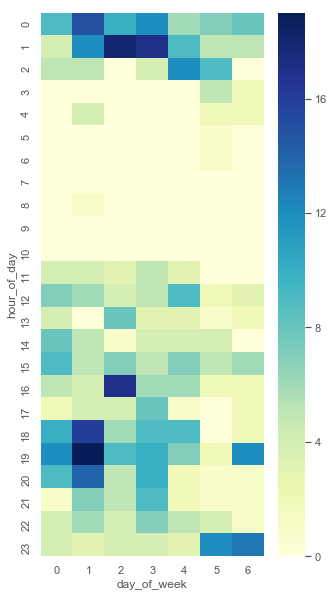

In [38]:
plt.figure(figsize=(5,10))
sns.heatmap(day_hour_df2, cmap="YlGnBu")

A few observations:
* I don't listen to Spotify on my morning commutes (between 8-10am depending when I leave the house)
* I usually listen in the afternoon at work and heavily during my commute home (between 6-8pm depending when I leave work)
* Weekend usage of Spotify is generally low compared to weekdays

In [39]:
day_hour_df2.to_csv('spotify_streaming_habits.csv',index=False)